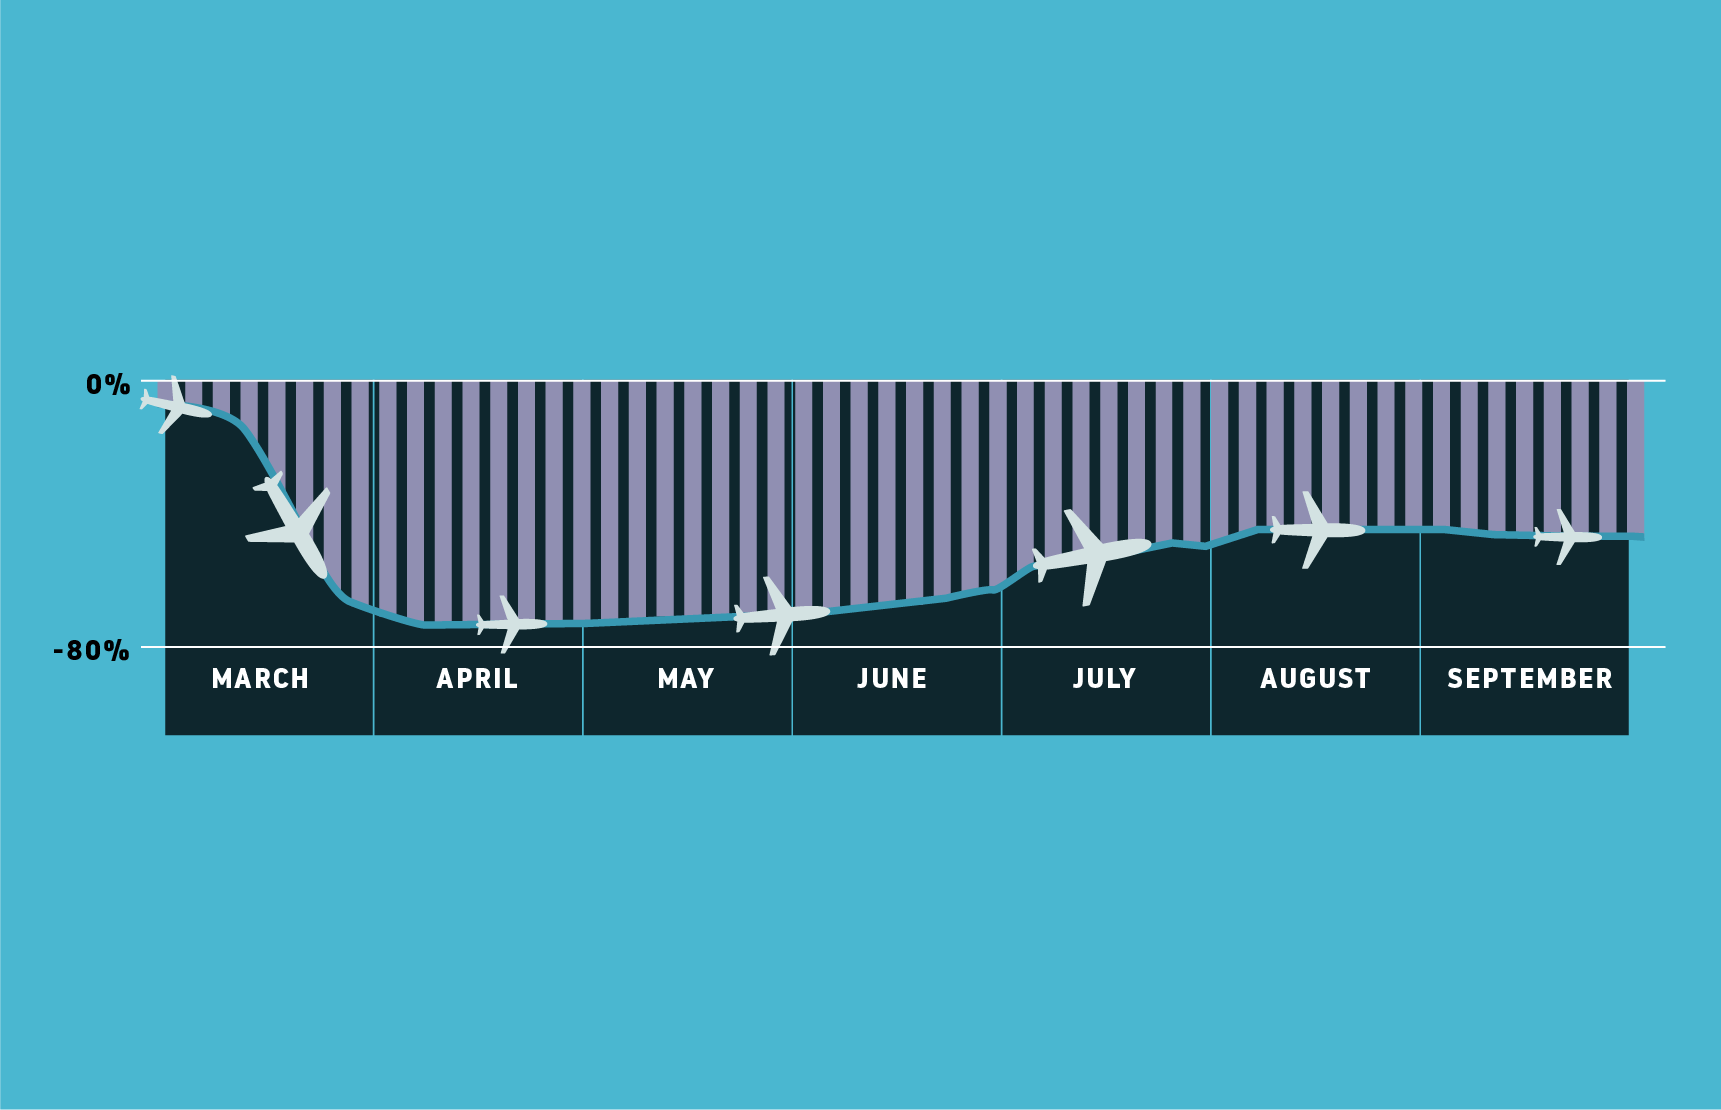

#### Time Series forecasting 
- It is a technique used to predict future values based on past observations.
- A time series is a data set that tracks a sample over time to see what factors influence certain variables from period to period.
- Forecasting methods using time series are used in both fundamental and technical analysis.


#### Components of Time series
- Trend - Its long term movement usually more than an year.
- Seasonality - It is short term like one year. It reflects upwards and downwards movements over a time period.
- Cyclicity - these are fluctuations in the data that are not of fixed period like seasonality but still have a noticeable pattern, e.g, recession, unemployment.
- Irregular/Random/Noise - It is like an error, it remains after removing the trend, seasonality, and cyclic patterns.

#### Dataset source & brief
- Dataset has been sourced from kaggle.
- This dataset provides monthly totals of a US airline passengers from 1949 to 1960.

#### Pre requisite for Time Series
- Dataset should be numeric in nature.
- Dataset should contain date and time & target variable.
- Data should be in sequential order.
- No missing values should be there.
- Check data components with the help of decomposition.
- Data should be stationary.

#### Types of Time Series Forecasting models
- Winter model/ 1960 model
- Holt's model
- Winter & Holt's model
- Autoregressive model (AR)
- Moving Average model (MA)
- Autoregressive Moving Average model (ARMA)
- Autoregressive Integrated Moving Average (ARIMA)
- ARIMA with Exogenous Variables (ARIMAX)
- Seasonal Autoregressive Integrated Moving Average (SARIMA)
- Seasonal Autoregressive Integrated Moving Average with Exogenous Variables (SARIMAX)
- Vector Autoregression (VAR)
- Vector Autoregressive Moving Average (VARMA)
- Vector Autoregressive Integrated Moving Average (VARIMA)
- many more...

#### Objective
- The objective is to forecast the number of passengers for the next 60 months using Time series models

#### Import Basic libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [2]:
df=pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#### Converting Month variable from categorical to numerical form

In [4]:
df['Month']=pd.to_datetime(df['Month'])

- Renaming #Passengers to Passengers

In [5]:
df.rename(columns={'#Passengers':'Passengers'},inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [7]:
df.tail(10)

,Month,Passengers
134,1960-03-01,419
135,1960-04-01,461
136,1960-05-01,472
137,1960-06-01,535
138,1960-07-01,622
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [8]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

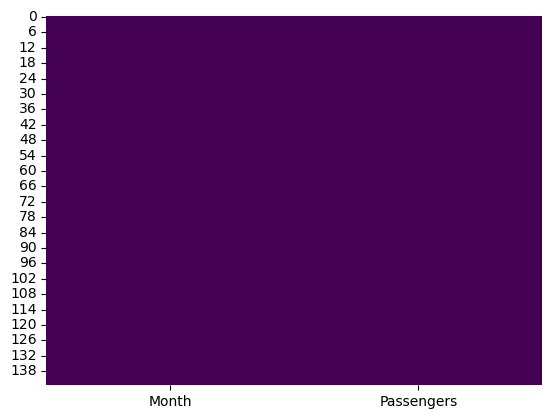

In [9]:
sns.heatmap(df.isnull(),cmap = 'viridis',cbar = False);

- No missing value present

#### Date and Time has to be converted into index

In [10]:
df.set_index('Month',inplace=True)

In [11]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


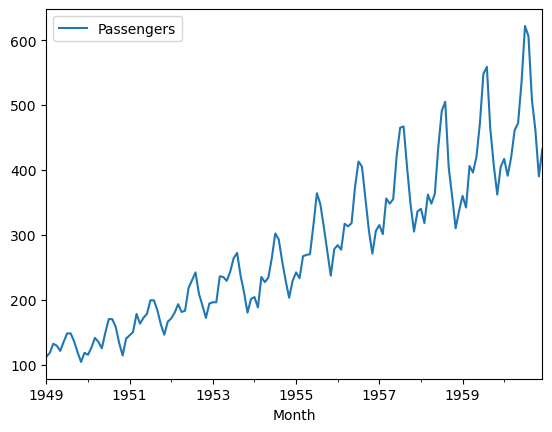

In [13]:
df.plot()
plt.show()

#### Visualization by using Decomposition

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_additive = seasonal_decompose(df['Passengers'],
                                            model='additive', period=12)
decomposition_multiplicative = seasonal_decompose(df['Passengers'],
                                            model='multiplicative', period=12)

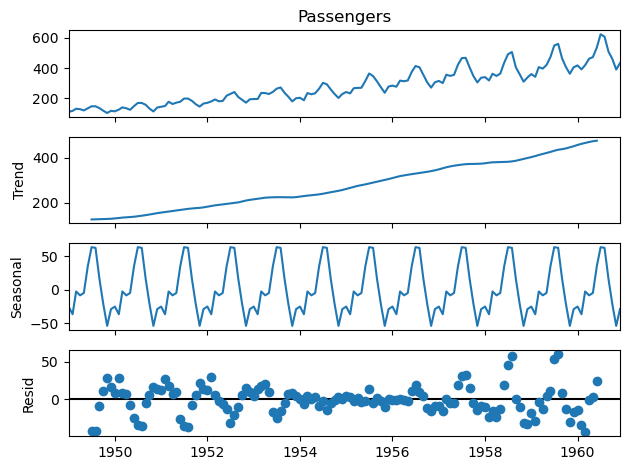

In [16]:
decomposition_additive.plot()
plt.show()

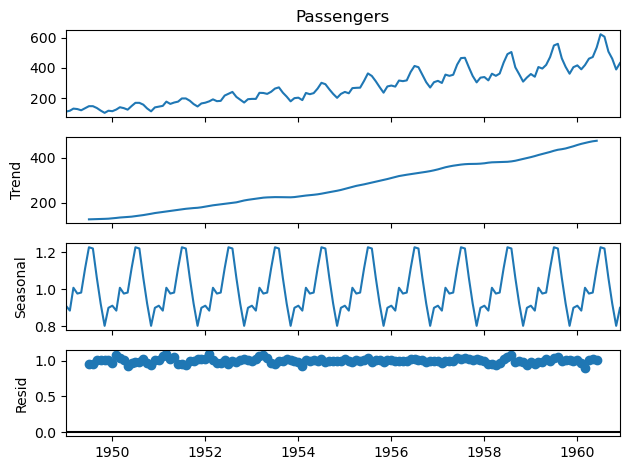

In [17]:
decomposition_multiplicative.plot()
plt.show()

#### Durbin Watson test to check autocorrelation

In [18]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Passengers'])

0.0121527966037621

- It is typical time series forecasting 

#### Dataset should be stationary
- Alternative Hypothesis- p- value should be less than or equal to 0.05
- Error Mean value standard deviation should be constant
- Augmented Dikey Fuller test & Rolling method are used to check whether data is stationary or not.

#### ADF Test
- Augmented Dickey-Fuller (ADF) test is a statistical test used to assess whether a given time series is stationary or not.
- It is an extension of the Dickey-Fuller test and includes additional terms to account for autocorrelation in the data. 
- The null hypothesis of the ADF test is that the time series has a unit root (i.e., it is non-stationary). The alternative hypothesis is that the time series is stationary.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
len(df)

144

In [21]:
adfuller(df['Passengers'])

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

- 0.8153688792060547 is Augmented Dikey Fuller statistics value
- 0.9918802434376411 is p-value
- 13 is lag function
- 130 is number of observations


In [22]:
def adf_check(timeseries):
    result=adfuller(timeseries)
    print('ADF Test result')
    labels=['ADF Statistics Value','p-value','Lags','No of observations']
    
    for i,j in zip(result,labels):
        print(j + " : " + str(i))
        
    if result[1] <=0.05:
        print('It is Alternative hypothesis & data is stationary')
    else:
        print ('It is Null hypothesis and data is not stationary')

In [23]:
adf_check(df['Passengers'])

ADF Test result
ADF Statistics Value : 0.8153688792060547
p-value : 0.9918802434376411
Lags : 13
No of observations : 130
It is Null hypothesis and data is not stationary


#### Data needs to converted into stationary data

#### Lag
- It refers to the time gap between two observations in a time series. 
- It is used to describe the relationship between a value in the time series and its previous value at a specific time interval.

In [24]:
df['Ist Lag difference']=(df['Passengers'])-(df['Passengers']).shift(1)

In [25]:
df.head(2)

,Passengers,Ist Lag difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0


In [26]:
adf_check(df['Ist Lag difference'].dropna())

ADF Test result
ADF Statistics Value : -2.829266824170004
p-value : 0.05421329028382491
Lags : 12
No of observations : 130
It is Null hypothesis and data is not stationary


In [27]:
df['2nd Lag difference']=(df['Ist Lag difference'])-(df['Ist Lag difference']).shift(1)

In [28]:
df.head(2)

,Passengers,Ist Lag difference,2nd Lag difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN


In [29]:
adf_check(df['2nd Lag difference'].dropna())

ADF Test result
ADF Statistics Value : -16.38423154246853
p-value : 2.732891850014085e-29
Lags : 11
No of observations : 130
It is Alternative hypothesis & data is stationary


#### Seasonality comparison for 12 months

In [30]:
df['Seasonality']=(df['Passengers'])-(df['Passengers']).shift(12)

In [31]:
df.head(20)

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [32]:
adf_check(df['Seasonality'].dropna())

ADF Test result
ADF Statistics Value : -3.3830207264924814
p-value : 0.011551493085514952
Lags : 1
No of observations : 130
It is Alternative hypothesis & data is stationary


- Trend & seasonality both are stationary now.
- pdq (Trend)/ PDQ (Seasonality) defines the orders of the autoregressive (AR), differencing (I), and moving average (MA) components in the model. 
- We got d=2 & D = 1 and need to find p,P & q,Q

#### To find P & Q basis graph

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [34]:
df.head()

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


#### Trend

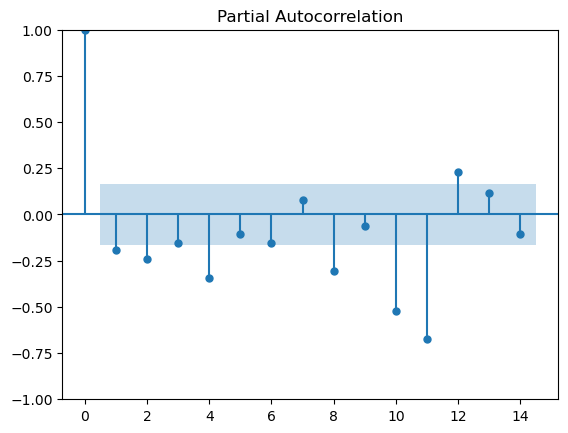

In [35]:
plot_pacf(df['2nd Lag difference'].dropna(),lags=14) #14 as we have to give more than 12 months
plt.show()

- In autocorrelation or partial correlation we will get visualization of -1 to +1 value
- We have to check only till the the first point which is inside the boundary (shaded area/threshold). 
- Here 5 is the first point inside the boundary which means sequence series ends there and correlation is not there so p=4

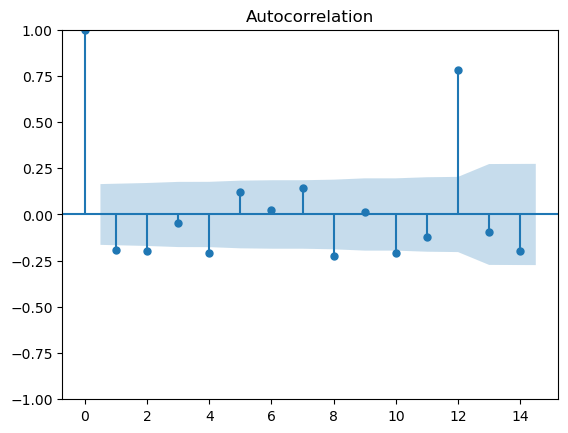

In [36]:
plot_acf(df['2nd Lag difference'].dropna(),lags=14) 
plt.show()

- Here we got q=2 as 3 is inside the boundary

#### Seasonality

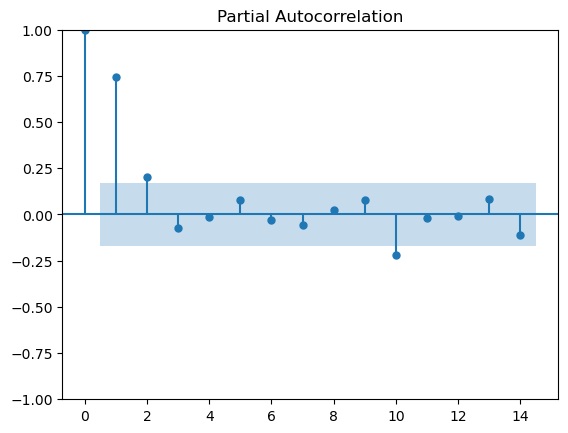

In [37]:
plot_pacf(df['Seasonality'].dropna(),lags=14) 
plt.show()

- We got P = 2

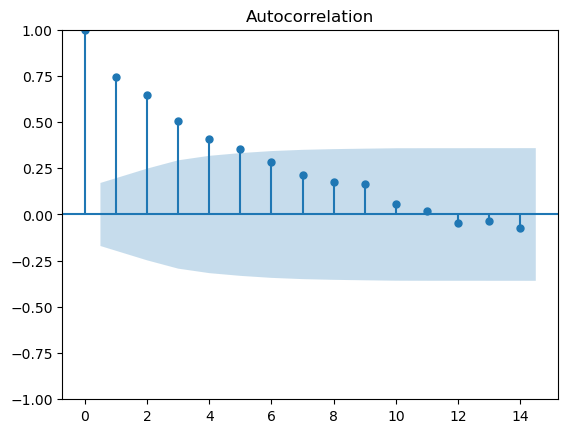

In [38]:
plot_acf(df['Seasonality'].dropna(),lags=14) 
plt.show()

- We got Q = 5

#### Model Building

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [42]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(4, 2, 2), seasonal_order=(2, 1, 5, 12))

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
result=model.fit()
print(result.summary())

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                            SARIMAX Results                                             
Dep. Variable:                                       Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -496.729
Date:                                          Wed, 29 Nov 2023   AIC                           1021.459
Time:                                                  22:10:09   BIC                           1061.604
Sample:                                              01-01-1949   HQIC                          1037.771
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

- AIC stands for "Akaike Information Criterion." It is a statistical measure used for model selection and model comparison in the context of regression analysis or time series modeling. Lesser the AIC value better the model
- SO checking Q separately with 4,3,2,1

In [44]:
model1=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(4, 2, 2), seasonal_order=(2, 1, 4, 12))
result1=model1.fit()
print(result1.summary())

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                           SARIMAX Results                                           
Dep. Variable:                                    Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -497.020
Date:                                       Wed, 29 Nov 2023   AIC                           1020.040
Time:                                               22:15:16   BIC                           1057.318
Sample:                                           01-01-1949   HQIC                          1035.187
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3731     

In [45]:
model2=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(4, 2, 2), seasonal_order=(2, 1, 3, 12))
result2=model2.fit()
print(result2.summary())

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                         SARIMAX Results                                          
Dep. Variable:                                 Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -497.188
Date:                                    Wed, 29 Nov 2023   AIC                           1018.377
Time:                                            22:15:52   BIC                           1052.787
Sample:                                        01-01-1949   HQIC                          1032.359
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3695      0.097    -14.088      0

In [46]:
model3=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(4, 2, 2), seasonal_order=(2, 1, 2, 12))
result3=model3.fit()
print(result3.summary())

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -497.783
Date:                            Wed, 29 Nov 2023   AIC                           1017.566
Time:                                    22:16:16   BIC                           1049.108
Sample:                                01-01-1949   HQIC                          1030.382
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3577      0.099    -13.675      0.000      -1.552      -1.163
ar.L2         -0.4919      0.145   

In [47]:
model4=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(4, 2, 2), seasonal_order=(2, 1, 1, 12))
result4=model4.fit()
print(result4.summary())

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                           Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -497.785
Date:                              Wed, 29 Nov 2023   AIC                           1015.569
Time:                                      22:17:05   BIC                           1044.245
Sample:                                  01-01-1949   HQIC                          1027.221
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3587      0.097    -14.030      0.000      -1.549      -1.169
ar.L2         -0.49

- Q=1 is giving the lesser AIC

##### Another approach to check lesser AIC

In [54]:
import itertools

p = d = q = range(0,2)   #2 lags (2 iterations) were there in Trend
pdq = list(itertools.product(p,d,q))
Seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {}'.format(pdq[1], Seasonal_pdq[1]))
print('{} x {}'.format(pdq[2], Seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)


In [57]:
for parameter_trend in pdq:
    for parameter_seasonal in Seasonal_pdq:
        try:
            model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=parameter_trend,seasonal_order=parameter_seasonal, 
                                             enforce_stationarity=False,enforce_invertibility=False)
            result=model.fit()
            print('ARIMA{}x{}-AIC{}'.format(parameter_trend,parameter_seasonal,result.aic))
        except:
            continue
            

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(0, 0, 0, 12)-AIC2044.4329486427587


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 

ARIMA(0, 0, 0)x(0, 0, 1, 12)-AIC1886.6012941219583
ARIMA(0, 0, 0)x(0, 1, 0, 12)-AIC1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)-AIC1156.2914901508518
ARIMA(0, 0, 0)x(1, 0, 0, 12)-AIC1118.6259190717344


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 0, 1, 12)-AIC1107.2562043237085
ARIMA(0, 0, 0)x(1, 1, 0, 12)-AIC1109.2437994445113


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)x(1, 1, 1, 12)-AIC1033.6172166729637
ARIMA(0, 0, 1)x(0, 0, 0, 12)-AIC1846.0789377571627


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 0, 1, 12)-AIC1567.9916312318614
ARIMA(0, 0, 1)x(0, 1, 0, 12)-AIC1196.9983614399857


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(0, 1, 1, 12)-AIC1072.1382984044378


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 0, 12)-AIC1071.002680495592


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 0, 1, 12)-AIC1049.5801421129454
ARIMA(0, 0, 1)x(1, 1, 0, 12)-AIC1059.511222329043


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)x(1, 1, 1, 12)-AIC985.3346478033212
ARIMA(0, 1, 0)x(0, 0, 0, 12)-AIC1405.0006612949667


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(0, 0, 1, 12)-AIC1194.7130010979704
ARIMA(0, 1, 0)x(0, 1, 0, 12)-AIC1024.4816429833936
ARIMA(0, 1, 0)x(0, 1, 1, 12)-AIC937.7995265380556


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(0, 1, 0)x(1, 0, 0, 12)-AIC1031.4838983661916
ARIMA(0, 1, 0)x(1, 0, 1, 12)-AIC1015.0000347580059


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 0, 12)-AIC944.4876301158425


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0)x(1, 1, 1, 12)-AIC939.7984372654357
ARIMA(0, 1, 1)x(0, 0, 0, 12)-AIC1379.4417180072924


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 0, 1, 12)-AIC1181.630945875926
ARIMA(0, 1, 1)x(0, 1, 0, 12)-AIC1006.7919047398655


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(0, 1, 1, 12)-AIC920.6308317604695
ARIMA(0, 1, 1)x(1, 0, 0, 12)-AIC1014.2239031825341


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 0, 1, 12)-AIC985.1362335087607
ARIMA(0, 1, 1)x(1, 1, 0, 12)-AIC934.7975425749124


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1)x(1, 1, 1, 12)-AIC920.3192974988949
ARIMA(1, 0, 0)x(0, 0, 0, 12)-AIC1415.9068815931885


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 0, 1, 12)-AIC1205.3907786172574
ARIMA(1, 0, 0)x(0, 1, 0, 12)-AIC1029.9773091701022


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(0, 1, 1, 12)-AIC944.3854921533178


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 0, 12)-AIC1017.315549351643


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 0, 1, 12)-AIC1007.0272556175718
ARIMA(1, 0, 0)x(1, 1, 0, 12)-AIC944.0441660825556


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0)x(1, 1, 1, 12)-AIC945.4400866837424
ARIMA(1, 0, 1)x(0, 0, 0, 12)-AIC1390.4515018414834


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 0, 1, 12)-AIC1192.2949631619488
ARIMA(1, 0, 1)x(0, 1, 0, 12)-AIC1014.2547824624687


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(0, 1, 1, 12)-AIC929.4329707892181


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 0, 12)-AIC1009.5891017292837


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 0, 1, 12)-AIC989.1764737575324
ARIMA(1, 0, 1)x(1, 1, 0, 12)-AIC935.816334821808


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1)x(1, 1, 1, 12)-AIC935.9152860551521
ARIMA(1, 1, 0)x(0, 0, 0, 12)-AIC1392.9437938537153


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 0, 1, 12)-AIC1190.5342929076292
ARIMA(1, 1, 0)x(0, 1, 0, 12)-AIC1013.3680449838157


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(0, 1, 1, 12)-AIC928.1312837305513


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 0, 12)-AIC1007.6496486405264


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 0, 1, 12)-AIC995.4636249453263
ARIMA(1, 1, 0)x(1, 1, 0, 12)-AIC927.5904374710306


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0)x(1, 1, 1, 12)-AIC928.1418620185419
ARIMA(1, 1, 1)x(0, 0, 0, 12)-AIC1377.2926858930796


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 0, 1, 12)-AIC1185.3340359693718
ARIMA(1, 1, 1)x(0, 1, 0, 12)-AIC1008.552881348966


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(0, 1, 1, 12)-AIC922.4148960115987


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 0, 12)-AIC1009.1896100682773


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 0, 1, 12)-AIC987.1339264685688


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 0, 12)-AIC929.5756208330703


C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1)x(1, 1, 1, 12)-AIC922.2053774352001


- SARIMAX(4, 2, 2)x(2, 1, [1], 12) - AIC 1015.569 # Approach 1 (manual)
- ARIMA(1, 1, 1)x(1, 1, 1, 12)-AIC922.2053774352001 # Approach 2(Generated by system)
- ARIMA(0, 1, 1)x(0, 1, 1, 12)-AIC920.6308317604695  # Approach 2(Lowest AIC)


In [68]:
model=sm.tsa.statespace.SARIMAX(df['Passengers'],order=(0,1,1), seasonal_order=(1, 1, 1, 12),enforce_stationarity=False,enforce_invertibility=False)
result=model.fit()
print(result.summary())

C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\manme\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.160
Date:                            Wed, 29 Nov 2023   AIC                            920.319
Time:                                    23:14:27   BIC                            931.368
Sample:                                01-01-1949   HQIC                           924.805
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3351      0.076     -4.403      0.000      -0.484      -0.186
ar.S.L12      -0.5597      0.285   

#### Training with given dataset
- Train = Till 130 and Test =130-144

In [69]:
df['Forecast']=result.predict(start=130,end=144, dynamic=True)
df

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality,Forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1960-08-01,606,-16.0,-103.0,47.0,602.524063
1960-09-01,508,-98.0,-82.0,45.0,503.586112
1960-10-01,461,-47.0,51.0,54.0,450.122021


#### Visualization

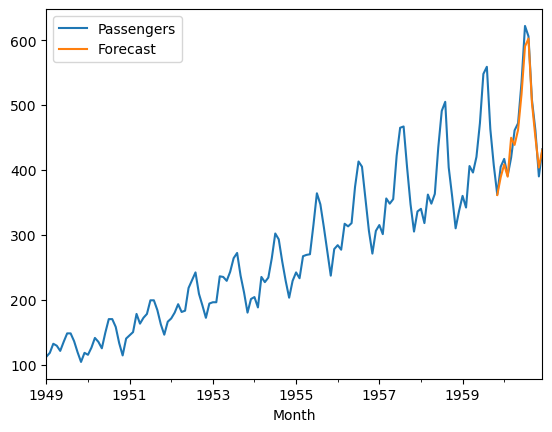

In [70]:
df[['Passengers','Forecast']].plot()
plt.show()

#### Predict the forecasting value for five years

In [71]:
from pandas.tseries.offsets import DateOffset

In [72]:
df.tail()

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality,Forecast
Month,,,,,
1960-08-01,606,-16.0,-103.0,47.0,602.524063
1960-09-01,508,-98.0,-82.0,45.0,503.586112
1960-10-01,461,-47.0,51.0,54.0,450.122021
1960-11-01,390,-71.0,-24.0,28.0,403.741479
1960-12-01,432,42.0,113.0,27.0,431.021243


In [75]:
future_date=[df.index[-1] + DateOffset(months=x) for x in range (0,61)]

In [76]:
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

#### Convert into DataFrame

In [77]:
future_date_df=pd.DataFrame(index=future_date[1:],columns=df.columns)
future_date_df

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN,NaN
1961-07-01,NaN,NaN,NaN,NaN,NaN
1961-08-01,NaN,NaN,NaN,NaN,NaN
1961-09-01,NaN,NaN,NaN,NaN,NaN
1961-10-01,NaN,NaN,NaN,NaN,NaN


#### Concatenating both datasets

In [78]:
final_df=pd.concat([df,future_date_df])
final_df

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN


#### Predicting

In [80]:
final_df['Forecast']=result.predict(start=144, end=204,dynamic=True)
final_df

,Passengers,Ist Lag difference,2nd Lag difference,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1965-08-01,NaN,NaN,NaN,NaN,786.270914
1965-09-01,NaN,NaN,NaN,NaN,689.286626
1965-10-01,NaN,NaN,NaN,NaN,640.662256
1965-11-01,NaN,NaN,NaN,NaN,572.550644


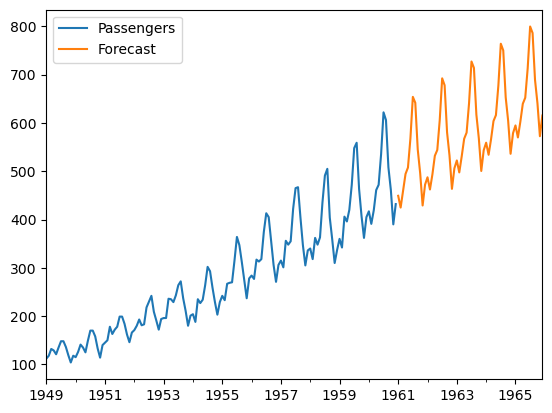

In [81]:
final_df[['Passengers','Forecast']].plot()
plt.show()

#### Saving the csv file

In [83]:
final_df.to_csv('final_df.csv')